In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
#%% defining plot function
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 11#7.
sns.set(style = 'whitegrid',context = 'poster', palette = 'dark')

def plot(u, r, v = None, u2 = None):
    if v is None:
        sns.scatterplot(trials, u+0.01, alpha = 0.7)
        sns.scatterplot(trials, r-0.01, alpha = 0.7)
        plt.xlabel("Trials")
        plt.ylabel("Values")
        plt.legend(labels = ['u', 'r'], loc='best')
        sns.despine()
    elif u2 is None:
        sns.scatterplot(trials, u+0.01, alpha = 0.7)
        sns.scatterplot(trials, r-0.01, alpha = 0.7)
        sns.scatterplot(trials, v, alpha = 0.7)
        plt.xlabel("Trials")
        plt.ylabel("Values")
        plt.legend(labels = ['u', 'r', 'v'], loc='best')
        sns.despine()
    else:
        sns.scatterplot(trials, u+0.01, alpha = 0.7)
        sns.scatterplot(trials, u2+0.03, alpha = 0.7)
        sns.scatterplot(trials, r-0.01, alpha = 0.7)
        sns.scatterplot(trials, v, alpha = 0.7)
        plt.xlabel("Trials")
        plt.ylabel("Values")
        plt.legend(labels = ['u1', 'u2', 'r', 'v'], loc='best')
        sns.despine()

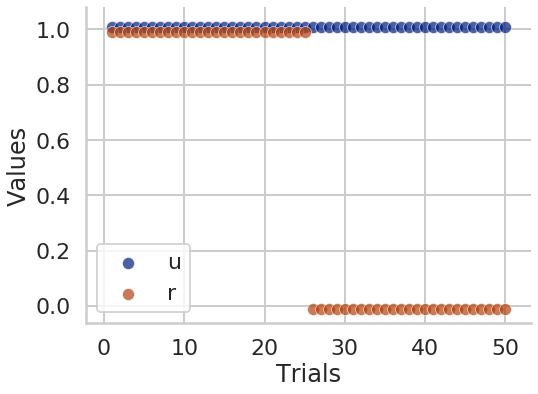

In [5]:
#%% 1-A) set the initail conditions
u = np.ones(50)
r =  np.concatenate((np.ones(25), np.zeros(25)), axis  = 0)

trials = np.array(range(1, 51))

plot(u, r)
plt.savefig('fig1_report2.png', dpi=600)
plt. show()

In [6]:
#%% defining Rescorla-Wagner function
# def rw_fun(u, r, u2 = None, e = 0.1, e2 = None):
#     if u2 is None:
#         v = np.zeros(50)
#         w = 0
#         for i in range(len(v)):
#             v[i] = w*u[i]

#             delta = r[i] - v[i]

#             w = w + e*delta*u[i]
#         return v
#     else:
#         v = np.zeros(50)
#         w1 = 0
#         w2 = 0
#         for i in range(len(v)):
#             v[i] = w1*u[i] + w2*u2[i]
            
#             delta = r[i] - v[i]

#             w1 = w1 + e*delta*u[i]
#             if e2 is None:
#                 w2 = w2 + e*delta*u2[i]
#             else:
#                 w2 = w2 + e2*delta*u2[i]
#         return v
def rw_fun(u, r, u2 = None, e = 0.1, e2 = None):
    if u2 is None:
        v = np.zeros(50)
        w = 0
        for i in range(len(v)):
            v[i] = w*u[i]

            delta = r[i] - v[i]

            w = w + e*delta*u[i]
        return v
    else:
        v1 = np.zeros(50)
        v2 = np.zeros(50)
        w1 = 0
        w2 = 0
        for i in range(len(v1)):
            v1[i] = w1*u[i]
            v2[i] = w2*u2[i]
            
            delta = r[i] - (v1[i] + v2[i])

            w1 = w1 + e*delta*u[i]
            if e2 is None:
                w2 = w2 + e*delta*u2[i]
            else:
                w2 = w2 + e2*delta*u2[i]
        return v1, v2

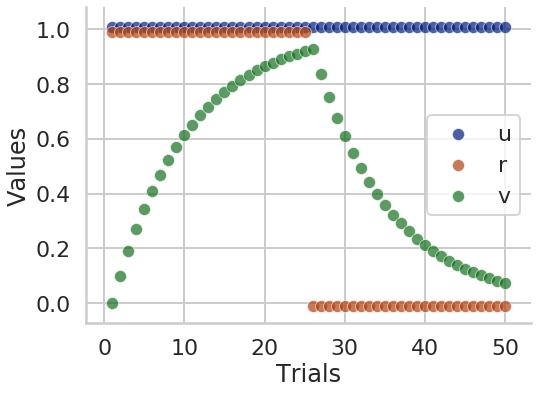

In [7]:
#%% 1-B) Applying RW to the original u and r
v = rw_fun(u, r)
plot(u, r, v)
plt.savefig('fig2_report2.png', dpi=600)
plt.show()

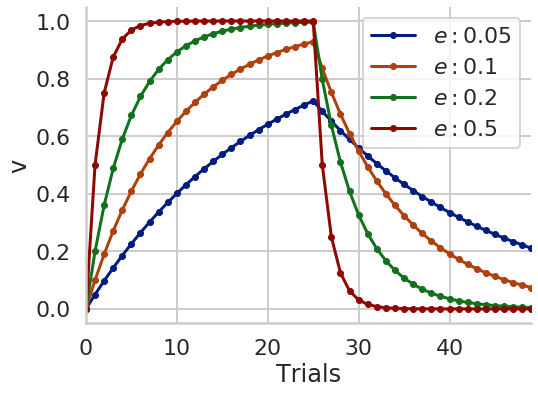

In [8]:
#%%
e_list = [0.05, 0.1, 0.2, 0.5]

e_df = pd.DataFrame()

for i, e in enumerate(e_list):
    v = rw_fun(u, r, e = e)
    e_df[r'$e: {}$'.format(e)] = pd.Series(v)

e_df.plot(marker='o', markersize=6)
plt.xlabel("Trials")
plt.ylabel("v")
sns.despine()
plt.savefig('fig3_report2.png', dpi=600)
#e_df.plot.scatter()
plt.show()

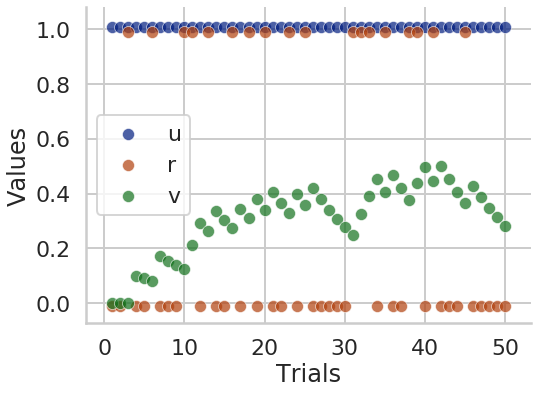

In [9]:
#%% 1 D) Partial reward: random reward
r = np.random.choice([0, 1], size=(50,), p=[0.6, 0.4])

v = rw_fun(u, r) 

plot(u, r, v)
plt.savefig('fig4_report2.png', dpi=600)
plt.show()

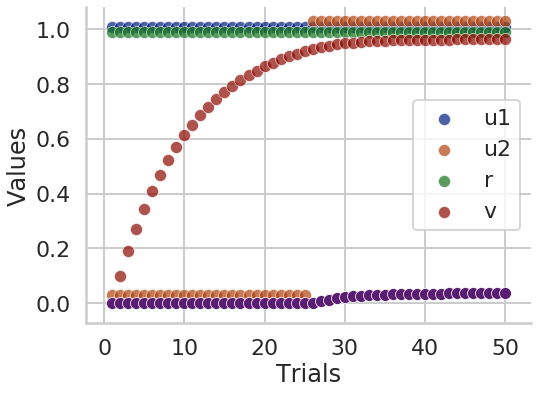

In [10]:
# 1 E) Blocking
u1 = np.ones(50)
u2 = np.concatenate((np.zeros(25), np.ones(25)),  axis  = 0)
r = np.ones(50)
v1, v2 = rw_fun(u1, r, u2 = u2)
plot(u1, r, v = v1, u2 = u2)
sns.scatterplot(trials, v2)
plt.savefig('fig5_report2.png', dpi=600)
plt.show()

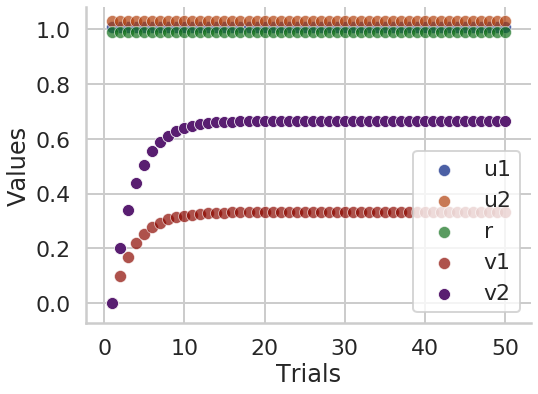

In [11]:
# 1 E) Overshadowing
u1 = np.ones(50)
u2 = np.ones(50)
r = np.ones(50)
v1, v2 = rw_fun(u1, r, u2 = u2, e2 = 0.2)
plot(u1, r, v = v1, u2 = u2)
sns.scatterplot(trials, v2)
plt.legend(labels = ['u1', 'u2', 'r', 'v1', 'v2'], loc='best')
plt.savefig('fig6_report2.png', dpi=600)
plt.show()